In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from matplotlib import pyplot as plt
import numpy as np
from keras.datasets import mnist
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
df = pd.read_csv ('/Users/briankimanzi/Downloads/mnist-in-csv/mnist_test.csv')
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


In [8]:
df.shape

(10000, 785)

In [9]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.mnist.load_data()

print(y_train_raw[0])
print(x_train_raw.shape, y_train_raw.shape)
print(x_test_raw.shape, y_test_raw.shape)

#Convert the labels into one hot codes.
num_classes = 10 #y_test.shape[1]
y_train = keras.utils.to_categorical(y_train_raw, num_classes)
y_test = keras.utils.to_categorical(y_test_raw, num_classes)
print(y_train[0])

5
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Data Visialization

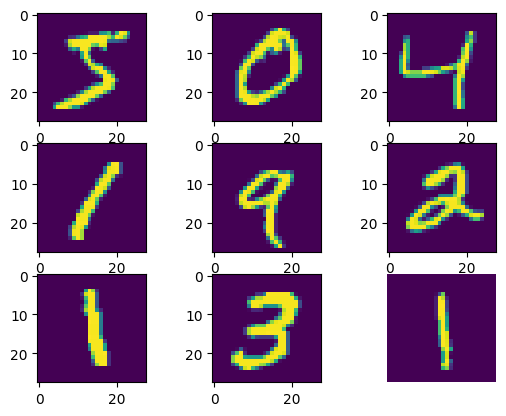

In [10]:
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train_raw[i])
#plt.ylabel(y[i].
plt.axis('off')
plt.show()

Data preprocessing

In [11]:
#Convert a 28 x 28 image into a 784 x 1
x_train = x_train_raw.reshape(60000, 784)
x_test = x_test_raw.reshape(10000, 784)

In [12]:
#Normalize image pixel
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

DNN Construction

In [13]:
#Create a deep neural network (DNN) model that consists of three fully connected layers andtwo RELU activation functions.
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_dim = 784),
    layers.Dense(256, activation='relu'),
    layers.Dense(124, activation='relu'),
layers.Dense(num_classes, activation='softmax')])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 124)            │        31,868 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 566,366 (2.16 MB)

 Trainable params: 566,366 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

Compiling the DNN Model

In [14]:
Optimizer = optimizers.Adam(0.001)
model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=Optimizer,
                metrics=['accuracy'])

In [15]:
#Fiting the training data to the model by using the fit method
model.fit(x_train,y_train,
         batch_size=128,
         epochs=10,
         verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.8801 - loss: 0.4308
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.9730 - loss: 0.0862
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9838 - loss: 0.0536
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9873 - loss: 0.0383
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9916 - loss: 0.0259
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9934 - loss: 0.0198
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9935 - loss: 0.0199
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.9953 - loss: 0.0150
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.9952 - loss: 0.0150
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.9961 - loss: 0.0124


In [11]:
#Evaluating the DNN Model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07198388874530792
Test accuracy: 0.9825999736785889


Saving the DNN Model

In [12]:
model.save('./mnist_model/final_DNN_model.h5')

# Building a CNN Model

In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [14]:
model=keras.Sequential() #Create a network sequence.
##Add the first convolutional layer and pooling layer

model.add(keras.layers.Conv2D(filters=32,kernel_size = 5,strides = (1,1),
                              padding = 'same',activation = tf.nn.relu,input_shape = (28,28,1)))

model.add(keras.layers.MaxPool2D( pool_size=(2,2), strides = (2,2), padding = 'valid'))

##Add the second convolutional layer and pooling
model.add(keras.layers.Conv2D(filters=64,kernel_size = 3,strides = (1,1),padding =
'same',activation = tf.nn.relu))
model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides = (2,2), padding = 'valid'))

##Add a dropout layer to reduce
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())

##Add two fully connected
model.add(keras.layers.Dense(units=128,activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=10,activation = tf.nn.softmax))

Compiling and Training the CNN Model

In [15]:
#Expand data dimensions to adapt to the CNN model
X_train=x_train.reshape(60000,28,28,1)
X_test=x_test.reshape(10000,28,28,1)

model.compile(optimizer=tf.optimizers.Adam(),loss="categorical_crossentropy",metrics=['accuracy'])
model.fit(x=X_train,y=y_train,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 33s 68ms/step - loss: 0.2658 - accuracy: 0.9192
Epoch 2/5
469/469 [==============================] - 34s 72ms/step - loss: 0.0888 - accuracy: 0.9740
Epoch 3/5
469/469 [==============================] - 36s 76ms/step - loss: 0.0659 - accuracy: 0.9806
Epoch 4/5
469/469 [==============================] - 35s 75ms/step - loss: 0.0557 - accuracy: 0.9832
Epoch 5/5
469/469 [==============================] - 38s 81ms/step - loss: 0.0473 - accuracy: 0.9858


Evaluating the CNN Model

In [78]:
test_acc=model.evaluate(x=X_test,y=mnist.test.labels)
print("Test Accuracy%.2f",test_acc)

AttributeError: module 'keras.datasets.mnist' has no attribute 'test'

Saving the CNN Model

In [53]:
test_loss,test_acc=model.evaluate(x=X_test,y=y_test)
print("Test Accuracy %.2f"%test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.0237 - accuracy: 0.9921
Test Accuracy 0.99


Prediction Result Visualization

In [ ]:
Create GUI to predict digits
Now for the GUI, we have created a new file in which we build an interactive window to draw digits on canvas and with a button, we can recognize the digit. 
The Tkinter library comes in the Python standard library. 
We have created a function predict_digit() that takes the image as input and then uses the trained model to predict the digit.
Then we create the App class which is responsible for building the GUI for our app.
e create a canvas where we can draw by capturing the mouse event and with a button, we trigger the predict_digit() function and display the results.

In [ ]:
from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
import numpy as np
model = load_model('./mnist_model/final_DNN_model.h5')
def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)

class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.x = self.y = 0
        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command =         self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)
    def clear_all(self):
        self.canvas.delete("all")
    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        im = ImageGrab.grab(rect)
        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')
    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')
app = App()
mainloop()